# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов!

Данные мы будем использовать из Kaggle соревнования: https://www.kaggle.com/competitions/nlp-getting-started/data 


Оттуда надо скачать файл train.csv. На обучающую и тестовую выборки его поделим кодом ниже, менять его не надо!

Мы будем работать с датасетом постов из твиттера. Нам предстоит решать задачу бинарной классификации - определять содержатся ли в твитте информация о настоящей катастрофе/инциденте или нет.

In [1]:
import pandas as pd
from typing import  List
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation

In [2]:
data = pd.read_csv('train.csv')
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [4]:
print('Количество пропусков в тренировочной выборке:', train.isnull().sum().sum())
print('Количество пропусков в тестовой выборке:', test.isnull().sum().sum())
train.fillna('', inplace=True)
test.fillna('', inplace=True)
print('Количество пропусков в тренировочной выборке после заполнения:', train.isnull().sum().sum())
print('Количество пропусков в тестовой выборке после заполнения:', test.isnull().sum().sum())

Количество пропусков в тренировочной выборке: 1804
Количество пропусков в тестовой выборке: 790
Количество пропусков в тренировочной выборке после заполнения: 0
Количество пропусков в тестовой выборке после заполнения: 0


## Задание 2 (1 балл)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Какое распределение классов в обучающей выборке?


In [5]:
class_distribution = train['target'].value_counts()
print(f'Количество элементов каждого класса в обучающей выборке:\n{class_distribution}')

Количество элементов каждого класса в обучающей выборке:
0    3024
1    2305
Name: target, dtype: int64


2. Посмотрите на колонку "keyword" - возьмите 10 наиболее встречающихся значений, постройте ступенчатую диаграмму распределения классов в зависимости от значения keyword, сделайте выводы.

In [6]:
popular_keywords = train['keyword'].value_counts().head(11)
popular_keywords = popular_keywords.drop('') # удаляем значения с пустой строкой
print(f'10 наиболее встречающихся значений в колонке `keyword`:\n{popular_keywords}')

10 наиболее встречающихся значений в колонке `keyword`:
damage        36
siren         35
wreckage      34
fatalities    33
deluge        31
refugees      30
derail        30
fear          30
tsunami       30
fatality      30
Name: keyword, dtype: int64


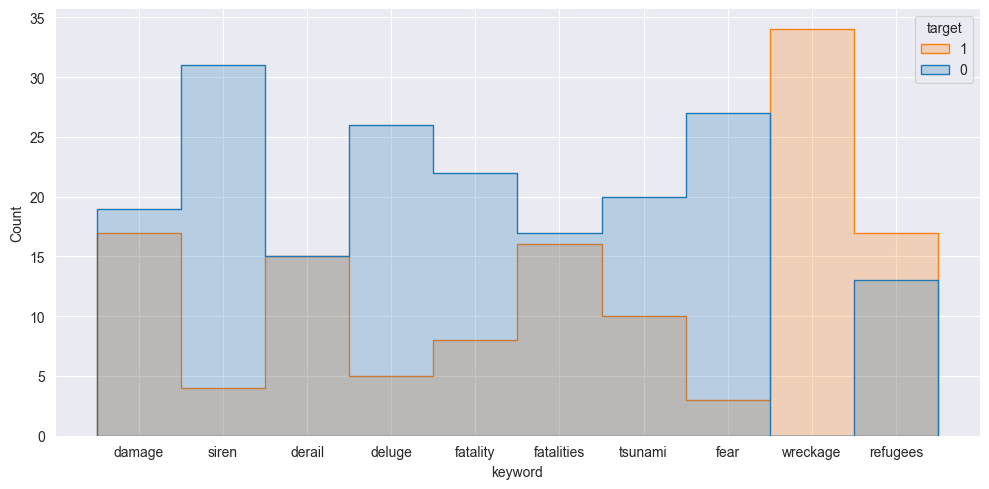

In [7]:
top_keywords = train[train['keyword'].isin(popular_keywords.index)]
sns.displot(data=top_keywords, x='keyword', hue='target',  element='step',
            height=5, aspect=2, legend=False)
plt.legend(title='target', loc='upper right', labels=[1, 0])
plt.show()

**Выводы**:
На графике видно, что распределение классов по ключевым словам неоднородно. Например  `wreckage`, показывает высокую вероятность того, что твит относится к `(target=1)`, в то время как другие ключевые слова, такие как `[siren, deluge, fatality, fear]`, чаще относится к `(target=0)`. Из этого следует, что ключевые слова могут быть важным признаком для предсказания целевой переменной. Это может помочь улучшить качество модели для классификации твитов на катастрофические и не катастрофические.

## Задание 3 (0.5 балла) 

В этом задании предлагается объединить все три текстовых столбца в один (просто сконкатенировать cтроки) и убрать столбец с индексом.

In [8]:
train.loc[[6590, 7122, 2769]]

,id,keyword,location,text,target
6590,9436,survivors,"Marietta, GA",Stemming from my #Cubs talk- the team rosters ...,1
7122,10203,violent%20storm,,If you were the NWS wth a rotating storm w/ a ...,1
2769,3980,devastation,Atlanta g.a.,http://t.co/Gxgm1T3W0J From Devastation to Ela...,0


In [9]:
# Объединение трех текстовых столбцов в один и удаление столбца с индексом
train_new = train[['keyword', 'location', 'text']].apply(lambda x: ' '.join(x), axis=1).reset_index(drop=True)
train_new = pd.concat([train[['keyword', 'location', 'text']], train_new], axis=1)

train_new.head(5)

,keyword,location,text,0
1186,bridge%20collapse,,Ashes 2015: AustraliaÛªs collapse at Trent Br...,inundated Bristol Hi @FionaGilbert_ sorry for ...
4071,hail,"Carol Stream, Illinois",GREAT MICHIGAN TECHNIQUE CAMP\nB1G THANKS TO @...,inundation Oh no. The Boots &amp; hearts soci...
5461,police,Houston,CNN: Tennessee movie theater shooting suspect ...,NaN
5787,rioting,,Still rioting in a couple of hours left until ...,NaN
7445,wounds,Lake Highlands,Crack in the path where I wiped out this morni...,NaN


In [10]:
train_new.loc[[6590, 7122, 2769]]

,keyword,location,text,0
6590,survivors,"Marietta, GA",Stemming from my #Cubs talk- the team rosters ...,NaN
7122,violent%20storm,,If you were the NWS wth a rotating storm w/ a ...,NaN
2769,devastation,Atlanta g.a.,http://t.co/Gxgm1T3W0J From Devastation to Ela...,"collide Vancouver, BC #Vancouver to host 100s ..."


## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [11]:
from sklearn.feature_extraction.text import CountVectorizer

vector = CountVectorizer()
train_counts = vector.fit_transform(train['text'])
print(*train_counts.shape, sep=' на ')

5329 на 16937


## Задание 5 (1 балл)

В предыдущем пункте у вас должна была получиться достаточно большая матрица.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов, ссылок и прочего мусора.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле vocabulary_ инстанса этого класса. Давайте напишем функцию, которая печает ответы на следующие вопросы:

1. Найдите в этом словаре все слова, которые содержат цифры. Сколько таких слов нашлось?

2. Найдите все слова, которые содержат символы пунктуации. Сколько таких слов нашлось? 

3. Сколько хэштегов (токен начинается на #) и упоминаний (токен начинается на @) осталось в словаре?

In [12]:
import re


def contains_digit(s: str) -> bool:
    # Проверка, содержит ли слово цифры
    return bool(re.search(r'\d', s))


def contains_punctuation(s: str) -> bool:
    # Проверка, содержит ли слово пунктуацию
    return any(char in punctuation for char in s)


def is_hashtag(s: str) -> bool:
    # Проверка, является ли слово хэштегом
    return bool(re.match(r"#\w+", s))


def is_mention(s: str) -> bool:
    # Проверка, является ли слово упоминанием
    return bool(re.match(r"@\w+", s))


def investigate_vocabulary(vocabulary):
    keys = vocabulary.keys()
    with_digit = sum(contains_digit(word) for word in keys)
    with_punctuation = sum(contains_punctuation(word) for word in keys)
    hashtags = sum(is_hashtag(word) for word in keys)
    mentions = sum(is_mention(word) for word in keys)
    print(f'With digit: {with_digit}')
    print(f'With punctuation: {with_punctuation}')
    print(f'Hashtags: {hashtags}')
    print(f'Mentions: {mentions}')

In [13]:
dummy_vocab = {'th1nk' : 0,
               'think333' : 1,
               'think.' : 2,
               'th!nk' : 3,
               'th...nk' : 4,
               '#think' : 5,
               '@think' : 6,
               '@thinking':7,
               '@nothink' : 8,
               'think' : 9}
investigate_vocabulary(dummy_vocab)

With digit: 2
With punctuation: 7
Hashtags: 1
Mentions: 3


In [14]:
investigate_vocabulary(vector.vocabulary_)

With digit: 3663
With punctuation: 300
Hashtags: 0
Mentions: 0


## Задание 6 (0.5 балла)

Вспомним, что на семинаре по текстам мы узнали, что в nltk есть специальный токенизатор для текстов - TweetTokenizer. Попробуем применить CountVectorizer с этим токенизатором. Ответьте на все вопросы из предыдущего пункта для TweetTokenizer и сравните результаты.

In [15]:
from nltk.tokenize import TweetTokenizer
# Чтобы узнать, какие параметры есть у этого токенайзера - используйте help(TweetTokenizer)
# Для того, чтобы передать токенайзер в CountVectorizer используйте параметр tokenizer

In [16]:
tweet_tokenizer = TweetTokenizer()
vectorizer = CountVectorizer(tokenizer=tweet_tokenizer.tokenize, token_pattern=None)
vectorizer.fit(train['text']);

In [17]:
investigate_vocabulary(vectorizer.vocabulary_)

With digit: 3781
With punctuation: 7136
Hashtags: 1438
Mentions: 1668


**Сравнение:**
Мы видим, что использование `TweetTokenizer` в `CountVectorizer` приводит к большему количеству слов, содержащих символы пунктуации, хэштеги и упоминания, так как TweetTokenizer предназначен для работы с твитами, в которых обычно присутствуют хэштеги и упоминания. В то же время, `CountVectorizer` с параметрами по умолчанию и стандартным токенизатором находит меньше слов, содержащих цифры и символы пунктуации.

## Задание 7 (2 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью TweetTokenizer из пакета nltk
2. Удалит все токены содержащие не латинские буквы, кроме смайликов (будем считать ими токены содержащие только пунктуацию и, как минимум, одну скобочку) и хэштегов, которые после начальной # содержат только латинские буквы.
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords.words('english')
4. Проведет стемминг с помощью SnowballStemmer



In [18]:
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import nltk

nltk.download('stopwords', quiet=True)

def contains_only_latin_letters(s: str) -> bool:
    return bool(re.fullmatch(r'[a-zA-Z]+', s))

def is_emoji(s: str) -> bool:
    return bool(re.fullmatch(r'[\W]*[()]+[\W]*', s))

def is_hashtag(s: str) -> bool:
    return bool(re.fullmatch(r'#[a-zA-Z]+', s))

def custom_tokenizer(s: str) -> List[str]:
    tokens = TweetTokenizer().tokenize(s.lower())
    english_stopwords = set(stopwords.words('english'))
    stemmer = SnowballStemmer('english')

    result = []
    for token in tokens:
        if (contains_only_latin_letters(token) or
            is_emoji(token) or
            is_hashtag(token)) and token not in english_stopwords:
            stemmed_token = stemmer.stem(token)
            result.append(stemmed_token)

    return result

In [19]:
custom_tokenizer('She LOVES painting :-) #art')

['love', 'paint', ':-)', '#art']

Продемонстрируйте работу вашей функции на первых десяти текстах в обучающей выборке.

In [20]:
sample_texts = train["text"].head(10)

for i, text in enumerate(sample_texts):
    print(f'Текст {i + 1}:\n{text}')
    print(f'Токенизация:\n{custom_tokenizer(text)}\n')

Текст 1:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0
Токенизация:
['ash', 'australia', 'collaps', 'trent', 'bridg', 'among', 'worst', 'histori', 'england', 'bundl', 'australia']

Текст 2:
GREAT MICHIGAN TECHNIQUE CAMP
B1G THANKS TO @bmurph1019 
@hail_Youtsey . @termn8r13 
#GoBlue #WrestleOn http://t.co/OasKgki6Qj
Токенизация:
['great', 'michigan', 'techniqu', 'camp', 'thank', '#goblu', '#wrestleon']

Текст 3:
CNN: Tennessee movie theater shooting suspect killed by police http://t.co/dI8ElZsWNR
Токенизация:
['cnn', 'tennesse', 'movi', 'theater', 'shoot', 'suspect', 'kill', 'polic']

Текст 4:
Still rioting in a couple of hours left until I have to be up for class.
Токенизация:
['still', 'riot', 'coupl', 'hour', 'left', 'class']

Текст 5:
Crack in the path where I wiped out this morning during beach run. Surface wounds on left elbow and right knee. http://t.co/yaqRSximph
Токенизация:
['crack', '

## Задание 8 (1 балл)

1. Примените CountVectorizer с реализованным выше токенизатором к обучающим и тестовым выборкам.


In [21]:
vectorizer = CountVectorizer(tokenizer=custom_tokenizer, token_pattern=None)
X_train = vectorizer.fit_transform(train["text"])
X_test = vectorizer.transform(test["text"]);

2. Обучите LogisticRegression на полученных признаках.


In [22]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, train["target"]);

3. Посчитайте метрику f1-score на тестовых данных.

In [23]:
from sklearn.metrics import f1_score

y_pred = logreg.predict(X_test)
f1 = f1_score(test["target"], y_pred)
print(f'f1-score: {f1}')

f1-score: 0.7524644030668127


## Задание 9 (1 балл)

1. Повторите 8 задание, но с tf-idf векторизатором. Как изменилось качество?


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer, token_pattern=None)
X_train_tfidf = tfidf_vectorizer.fit_transform(train["text"])
X_test_tfidf = tfidf_vectorizer.transform(test["text"])

logreg_tfidf = LogisticRegression(random_state=42, max_iter=1000)
logreg_tfidf.fit(X_train_tfidf, train["target"])

y_pred_tfidf = logreg_tfidf.predict(X_test_tfidf)

f1_tfidf = f1_score(test["target"], y_pred_tfidf)

print(f'TF-IDF f1-score: {f1_tfidf}')
print('На такую величину изменилось качество', f1 - f1_tfidf)

TF-IDF f1-score: 0.7418803418803419
На такую величину изменилось качество 0.010584061186470817


1. **Ответ:**  
В нашем случае значение `f1` уменьшилось, поэтому может сказаь, что качество нашей модели ухудшилось 

2. Мы можем еще сильнее уменьшить размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


In [25]:
tfidf_vectorizer_max = TfidfVectorizer(tokenizer=custom_tokenizer, max_df=0.9, token_pattern=None)
X_train_tfidf_max = tfidf_vectorizer_max.fit_transform(train["text"])
X_test_tfidf_max = tfidf_vectorizer_max.transform(test["text"])

logreg_tfidf_max = LogisticRegression(random_state=42, max_iter=1000)
logreg_tfidf_max.fit(X_train_tfidf_max, train["target"])

y_pred_tfidf_max = logreg_tfidf_max.predict(X_test_tfidf_max)

f1_tfidf_max = f1_score(test["target"], y_pred_tfidf_max)

print(f'TF-IDF с верхней границей 0.9 f1-score: {f1_tfidf_max}')

TF-IDF с верхней границей 0.9 f1-score: 0.7418803418803419


In [26]:
print(f'Обычный размер матрицы:', *X_train_tfidf.shape)
print(f'Матрица с верхней границей 0.9:', *X_train_tfidf_max.shape)

Обычный размер матрицы: 5329 9260
Матрица с верхней границой 0.9: 5329 9260


2. **Ответ:**  Размер матриц не изменился `TfidfVectorizer` с параметром `max_df=0.9`, потому что в документах обучающей и тестовой выборок нет слов, частота которых превышает 90% от общего количества документов. Следовательно также не изменился параметр `f1`

3. Также мы можем уменьшить размер матрицы, удаляя слова со слишком маленьким df. Удалось ли добиться улучшения качества? 

In [27]:
tfidf_vectorizer_min = TfidfVectorizer(tokenizer=custom_tokenizer, min_df=5, token_pattern=None)
X_train_tfidf_min = tfidf_vectorizer_min.fit_transform(train["text"])
X_test_tfidf_min = tfidf_vectorizer_min.transform(test["text"])

logreg_tfidf_min = LogisticRegression(random_state=42, max_iter=1000)
logreg_tfidf_min.fit(X_train_tfidf_min, train["target"])

y_pred_tfidf_min = logreg_tfidf_min.predict(X_test_tfidf_min)

f1_tfidf_min = f1_score(test["target"], y_pred_tfidf_min)
print(f'TF-IDF с нижней границе 5 f1-score: {f1_tfidf_min}')

TF-IDF с нижней границе 5 f1-score: 0.7488839285714286


In [28]:
print(f'Обычный размер матрицы:', *X_train_tfidf.shape)
print(f'Уменьшенный размер матрицы:', *X_train_tfidf_min.shape)

Обычный размер матрицы: 5329 9260
Уменьшенный размер матрицы: 5329 1792


3. **Ответ:**  
При уменьшении размера матрицы путем удаления слов с низким значением df, мы сократили количество столбцов в матрице на 7468. Это означает, что мы удалили слова, которые встречаются слишком редко в документах и не имеют большой важности для классификации текстов. Этот результат хуже, чем `f1`, но лучше, чем другие результаты с TF-IDF.

## Задание 10 (1 балл)

Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 8 с HashingVectorizer, укажите количество фичей равное 5000.


In [29]:
from sklearn.feature_extraction.text import HashingVectorizer

vectorizer = HashingVectorizer(tokenizer=custom_tokenizer, n_features=5000, norm=None, token_pattern=None)
X_train = vectorizer.fit_transform(train["text"])
X_test = vectorizer.transform(test["text"])

logreg = LogisticRegression(random_state=42, max_iter=1000).fit(X_train, train["target"])

y_pred = logreg.predict(X_test)
f1 = f1_score(test["target"], y_pred)

print(f'F1 score: {f1}')

F1 score: 0.7292457948996203


2. Какой из подходов показал самый высокий результат?

2. **Ответ:**  
Самый высокий результат показала изначальная модель `0.7524...`.

## Задание 11 (1 балл)

В этом задании нужно добиться f1 меры хотя в 0.75 на тестовых данных.

In [30]:
vectorizer = CountVectorizer(tokenizer=custom_tokenizer, token_pattern=None)
X_train = vectorizer.fit_transform(train["text"])
X_test = vectorizer.transform(test["text"])
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, train["target"])

y_pred = logreg.predict(X_test)
f1 = f1_score(test["target"], y_pred)
if f1 > 0.75:
    print(f'Задание выполнено успешно с результатом f1-score: {f1}')

Задание выполнено успешно с результатом f1-score: 0.7524644030668127
